In [68]:
import pandas as pd
import numpy as np

data=pd.read_csv('Dynasty_w_Performance.csv')

In [69]:
data.head()

,Rank,Player,Team,Year,Pos,AGE,Round,Rookie,Fantasy Points,ADP,...,Rd 7-9,Rd 10+,xgb_round,Performance_Metric,#1,#2,#3,#4,#5,#6
0,1,Christian McCaffrey,CAR,2020,RB,24,1,No,411.20,1.33,...,0,0,1,72.1,1,2,1,1,1,2
1,2,Saquon Barkley,NYG,2020,RB,23,1,No,218.10,1.67,...,0,0,1,37.3,2,1,2,2,2,1
2,3,Ezekiel Elliott,DAL,2020,RB,24,1,No,284.70,3.67,...,0,0,1,58.1,4,4,3,4,3,4
3,4,Michael Thomas,NOS,2020,WR,27,2,No,300.10,4.00,...,0,0,1,57.2,3,3,5,3,4,6
4,5,Alvin Kamara,NOS,2020,RB,25,3,No,208.02,5.83,...,0,0,1,23.7,5,8,7,5,7,3


In [3]:
data.dtypes

Rank                    int64
Player                 object
Team                   object
Year                    int64
Pos                    object
AGE                     int64
Round                  object
Rookie                 object
Fantasy Points        float64
ADP                   float64
Rd_drafted              int64
Rd 1-3                  int64
Rd 4-6                  int64
Rd 7-9                  int64
Rd 10+                  int64
Performance_Metric    float64
#1                      int64
#2                      int64
#3                      int64
#4                      int64
#5                      int64
#6                      int64
dtype: object

In [10]:
data['Rd_drafted']=pd.Categorical(data.Rd_drafted)

data['Rd_drafted'].value_counts(ascending=True)

21     13
6      70
16     73
15     73
1      77
9      81
2      81
5      81
10     82
11     83
12     86
14     87
3      87
17     87
4      88
8      88
18     89
7      90
13     90
19    115
20    240
Name: Rd_drafted, dtype: int64

In [70]:
dynasty=data[(data['Year']!=2014)&(data['Rookie']=='No')]

In [23]:
dynasty.shape

(1321, 18)

In [24]:
dynasty.describe()

,Rank,Year,AGE,Fantasy Points,ADP,Performance_Metric,#1,#2,#3,#4,#5,#6
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,132.812263,2017.539743,26.199092,128.355231,131.614898,16.267600,132.090840,131.009841,131.876609,131.042392,131.909160,131.749432
std,79.253102,1.714502,3.513248,84.643395,75.926910,13.391615,77.377817,77.375662,77.260700,77.015699,77.403034,77.157945
min,1.000000,2015.000000,21.000000,-2.300000,1.170000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,63.000000,2016.000000,24.000000,67.100000,64.000000,5.300000,63.000000,63.000000,63.000000,63.000000,64.000000,63.000000
50%,132.000000,2018.000000,25.000000,121.200000,133.330000,14.700000,133.000000,130.000000,132.000000,131.000000,132.000000,131.000000
75%,203.000000,2019.000000,28.000000,181.000000,204.170000,24.300000,204.000000,203.000000,205.000000,203.000000,204.000000,204.000000
max,278.000000,2020.000000,42.000000,415.680000,240.670000,74.200000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000


In [25]:
dynasty['Rd_drafted'].value_counts(ascending=True)

21     10
15     41
16     52
6      52
10     54
8      55
11     55
5      58
13     59
14     59
12     61
2      61
7      62
9      63
17     63
18     63
1      64
4      65
3      65
19     80
20    179
Name: Rd_drafted, dtype: int64

In [26]:
dynasty['Pos'].value_counts()

WR    552
RB    400
TE    195
QB    174
Name: Pos, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

encoder=LabelEncoder()

scaler=MinMaxScaler()

dynasty['Pos']=encoder.fit_transform(dynasty['Pos'])

dynasty['Pos'].value_counts()


C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


3    552
1    400
2    195
0    174
Name: Pos, dtype: int64

In [7]:
target=dynasty.loc[:,'Rd_drafted']

data_scale=dynasty.loc[:,['Pos','AGE','Fantasy Points','Performance_Metric']]
col_names=data_scale.columns

data_scale=scaler.fit_transform(data_scale)

features=pd.DataFrame(data_scale, columns=col_names)

features.head()



,Pos,AGE,Fantasy Points,Performance_Metric
0,0.333333,0.142857,0.989282,0.971698
1,0.333333,0.095238,0.527298,0.502695
2,0.333333,0.142857,0.686636,0.783019
3,1.000000,0.285714,0.723480,0.770889
4,0.333333,0.190476,0.503182,0.319407


In [36]:
features.shape

(1321, 4)

In [37]:
target.shape

(1321,)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()

x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=.2,random_state=123)

rfc.fit(x_train,y_train)

rfc_predictions=rfc.predict(x_test)

accuracy_score(y_test,rfc_predictions)
 




0.14339622641509434

In [9]:
y_test['Pred']=y_test

rfc_df=pd.merge(dynasty,y_test[['Pred']],how = 'left',left_index = True, right_index = True)

rfc_df

,Rank,Player,Team,Year,Pos,AGE,Round,Rookie,Fantasy Points,ADP,...,Rd 7-9,Rd 10+,Performance_Metric,#1,#2,#3,#4,#5,#6,Rd_drafted_y
0,1,Christian McCaffrey,CAR,2020,1,24,1,No,411.20,1.33,...,0,0,72.1,1,2,1,1,1,2,NaN
1,2,Saquon Barkley,NYG,2020,1,23,1,No,218.10,1.67,...,0,0,37.3,2,1,2,2,2,1,NaN
2,3,Ezekiel Elliott,DAL,2020,1,24,1,No,284.70,3.67,...,0,0,58.1,4,4,3,4,3,4,NaN
3,4,Michael Thomas,NOS,2020,3,27,2,No,300.10,4.00,...,0,0,57.2,3,3,5,3,4,6,NaN
4,5,Alvin Kamara,NOS,2020,1,25,3,No,208.02,5.83,...,0,0,23.7,5,8,7,5,7,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,255,Rod Streater,OAK,2015,3,27,Undrafted,No,18.90,238.50,...,0,1,0.0,226,241,241,241,241,241,NaN
1609,256,Jonas Gray,MIA,2015,1,25,Undrafted,No,72.40,239.67,...,0,1,0.0,241,241,241,241,241,233,NaN
1610,257,Marlon Brown,BAL,2015,3,24,Undrafted,No,37.50,239.83,...,0,1,0.0,236,239,241,241,241,241,NaN
1611,258,Travaris Cadet,NEP,2015,1,26,Undrafted,No,53.80,239.83,...,0,1,2.8,241,241,241,241,241,234,NaN


In [72]:
rfc_df=pd.DataFrame(list(zip(y_test, rfc_predictions)), columns=['Actual Rd','Preditced Rd'])

rfc_df

,Actual Rd,Preditced Rd
0,15,10
1,4,8
2,15,14
3,16,19
4,19,7
...,...,...
260,14,17
261,2,9
262,10,12
263,5,9


In [ ]:
rfc_df.merge(dynasty['Player'],left_index=True,right_index=True)

In [90]:
pd.DataFrame(rfc.predict_proba(x_test),columns=['Rd1','Rd2','Rd3','Rd4','Rd5','Rd6','Rd7','Rd8','Rd9','Rd10','Rd11','Rd12','Rd13','Rd14','Rd15','Rd16','Rd17',
                                               'Rd18','Rd19','Rd20','Rd21'])

,Rd1,Rd2,Rd3,Rd4,Rd5,Rd6,Rd7,Rd8,Rd9,Rd10,...,Rd12,Rd13,Rd14,Rd15,Rd16,Rd17,Rd18,Rd19,Rd20,Rd21
0,0.02,0.060000,0.000000,0.01,0.00,0.00,0.09,0.01,0.02,0.350000,...,0.030000,0.02,0.14,0.01,0.03,0.040000,0.04,0.040000,0.02,0.02
1,0.00,0.000000,0.000000,0.02,0.01,0.01,0.17,0.48,0.01,0.010000,...,0.000000,0.00,0.02,0.00,0.00,0.000000,0.05,0.160000,0.04,0.00
2,0.00,0.000000,0.000000,0.00,0.10,0.14,0.07,0.06,0.17,0.000000,...,0.010000,0.05,0.20,0.01,0.00,0.010000,0.05,0.000000,0.04,0.00
3,0.00,0.000000,0.107461,0.00,0.00,0.00,0.00,0.00,0.00,0.113263,...,0.171128,0.00,0.00,0.07,0.00,0.082977,0.10,0.255172,0.10,0.00
4,0.00,0.000000,0.000000,0.01,0.08,0.01,0.33,0.04,0.00,0.020000,...,0.000000,0.03,0.24,0.03,0.01,0.010000,0.06,0.110000,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.00,0.020000,0.060000,0.00,0.14,0.19,0.00,0.00,0.01,0.140000,...,0.010000,0.05,0.00,0.01,0.00,0.350000,0.00,0.000000,0.00,0.00
261,0.00,0.010000,0.010000,0.05,0.04,0.01,0.12,0.03,0.21,0.100000,...,0.080000,0.00,0.05,0.03,0.14,0.020000,0.06,0.000000,0.01,0.00
262,0.01,0.020000,0.040000,0.07,0.18,0.05,0.00,0.03,0.01,0.090000,...,0.300000,0.15,0.00,0.01,0.00,0.030000,0.00,0.000000,0.01,0.00
263,0.00,0.040000,0.080000,0.04,0.01,0.21,0.06,0.07,0.30,0.010000,...,0.020000,0.03,0.04,0.00,0.00,0.000000,0.05,0.000000,0.00,0.00


In [53]:
import xgboost as xgb
y_test=y_test.astype(float)

train=xgb.DMatrix(x_train,label=y_train)
test=xgb.DMatrix(x_test,label=y_test)

params={
    'max_depth': 3,
    'eta':1,
    'objective':'multi:softmax',
    
    
    
}

In [54]:
xg_cl=xgb.XGBClassifier(objective='multi:softmax',n_estimators=10,num_classes=20)

xg_cl.fit(x_train,y_train)

[11:58:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_classes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_classes=20, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
xg_predictions=xg_cl.predict(x_test)

accuracy_score(y_test,xg_predictions)

0.16226415094339622

In [71]:
rd_target=dynasty.iloc[:,[11,12,13,14]]

rd_target

,Rd 1-3,Rd 4-6,Rd 7-9,Rd 10+
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1608,0,0,0,1
1609,0,0,0,1
1610,0,0,0,1
1611,0,0,0,1


In [20]:
train_x,test_x,train_y,test_y=train_test_split(features,rd_target,test_size=.2,random_state=123)

In [31]:
rfc.fit(train_x,train_y)

round_predictions=rfc.predict(test_x)

accuracy_score(test_y,round_predictions)




0.6037735849056604

In [23]:
rfc.predict_proba(test_x)

[array([[0.94      , 0.06      ],
        [1.        , 0.        ],
        [0.99      , 0.01      ],
        [0.90881327, 0.09118673],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [0.88      , 0.12      ],
        [0.96      , 0.04      ],
        [0.998     , 0.002     ],
        [0.96      , 0.04      ],
        [0.88      , 0.12      ],
        [0.9952381 , 0.0047619 ],
        [1.        , 0.        ],
        [0.79      , 0.21      ],
        [0.29      , 0.71      ],
        [1.        , 0.        ],
        [0.98      , 0.02      ],
        [1.        , 0.        ],
        [0.91      , 0.09      ],
        [1.        , 0.        ],
        [0.99      , 0.01      ],
        [0.93      , 0.07      ],
        [0.87      , 0.13      ],
        [1.        , 0.        ],
        [0.99      , 0.01      ],
        [1.        , 0.        ],
        [0.76      , 0.24      ],
        [1.        , 0.        ],
        [1.   

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(test_y.values.argmax(axis=1),round_predictions.argmax(axis=1))



array([[ 25,   4,   1,   5],
       [ 12,  10,   3,  11],
       [  9,   0,   3,  26],
       [ 19,   3,   5, 129]], dtype=int64)

In [40]:
import itertools
import matplotlib.pyplot as plt

#Plot feautres of the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis-1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion Matrix w/o Normalization')
    print(cm)
    #Creates threshold to determine font color and labels each section of confusion matrix with their number 
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j]),
        horizontalaligment='center',
        color='white'if cm[i,j]>thresh else 'black'
    
    
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion Matrix w/o Normalization
[[ 25   4   1   5]
 [ 12  10   3  11]
 [  9   0   3  26]
 [ 19   3   5 129]]


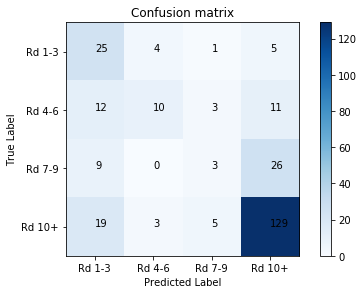

In [56]:
#Pots confusion matrix
cm=confusion_matrix(test_y.values.argmax(axis=1),round_predictions.argmax(axis=1))

cm_plot_labels=['Rd 1-3','Rd 4-6','Rd 7-9','Rd 10+']
plot_confusion_matrix(cm, cm_plot_labels)

In [102]:
xgb_target=dynasty.loc[:,'xgb_round']

train_x,test_x,train_y,test_y=train_test_split(features,xgb_target,test_size=.2,random_state=123)


xgb_train=xgb.DMatrix(train_x)
xgb_test=xgb.DMatrix(test_x)

y_test_df=pd.DataFrame(test_y)

y_test_df.index


Int64Index([ 449,  874, 1260,  734,  233, 1583, 1256,  960,  896,  890,
            ...
             884,  214,  668, 1045,  715,  712, 1108,  117, 1401,  793],
           dtype='int64', length=265)

In [112]:
xg_df=pd.DataFrame(list(zip(test_y,xgb_predictions)),columns=['Actual','Predicted'])
xg_df=xg_df.set_index(y_test_df.index)

xg_df=xg_df.merge(dynasty[['Player','Year']],left_index=True,right_index=True)
col=['Player','Year','Actual','Predicted']

xg_df=xg_df.reindex(columns=col)

xg_df.to_csv('XG_actual_vs_predicted.csv')

In [78]:
xg_round=xgb.XGBClassifier(objective='multi:softmax',n_estimators=10,num_classes=4)

xg_round.fit(train_x,train_y)

[12:48:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_classes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_classes=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
xgb_predictions=xg_round.predict(test_x)

accuracy_score(test_y,xgb_predictions)

0.6830188679245283

Confusion Matrix w/o Normalization
[[ 20   7   1   7]
 [  5  10   1  20]
 [  1   3   4  30]
 [  2   5   2 147]]


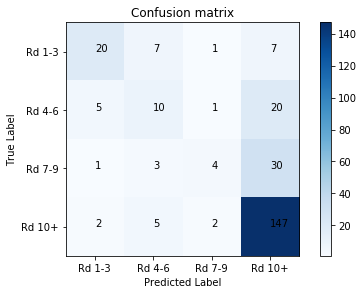

In [83]:
#Plots confusion matrix
cm=confusion_matrix(test_y,xgb_predictions)

cm_plot_labels=['Rd 1-3','Rd 4-6','Rd 7-9','Rd 10+']
plot_confusion_matrix(cm, cm_plot_labels)

In [120]:
prob_df=pd.DataFrame(xg_round.predict_proba(test_x), columns=['Rd 1-3','Rd 4-6','Rd 7-9','Rd 10+'])

prob_df=prob_df.set_index(y_test_df.index)

prob_df=prob_df.merge(dynasty[['Player','Year']],left_index=True,right_index=True)

col_names=['Player','Year','Rd 1-3','Rd 4-6','Rd 7-9','Rd 10+']

prob_df=prob_df.reindex(columns=col_names)

prob_df.to_csv('Probability.csv')